# **ELEMENTOS FINITOS OLVER**

## **Ejemplo 14.3**

El primer ejemplo que implementamos es el 14.3, que pide aproximar la solución del siguiente problema de condición de frontera 

$$  -\frac{d}{dx}(x + 1) \frac{du}{dx} = 1 \quad \quad \quad  u(0)=0 \quad \quad \quad  u(1)=0 $$

Teóricamente sabemos que la solución está dada por

$$ u(x) = -x + \frac{\log(x + 1)}{\log 2}$$

Para usar el método de elementos finitos en este problema de una variable, tomamos una partición regular del intervalo $[0,1]$

$$0=x_{0}<x_{1}<...<x_{n}=1$$

Es sencillo notar que una base para las funciones de W está dada por lo que el texto de
Olver llama las "hat functions", que satisfacen:

In [ ]:
import sys
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user matplotlib

#Importamos las Librerías Necesarias
from IPython.display import display, Image
import matplotlib.pyplot as plt 
import numpy as np

#Personalizamos las opciones de impresión de matrices
np.set_printoptions(suppress=True, precision=4, threshold=sys.maxsize)

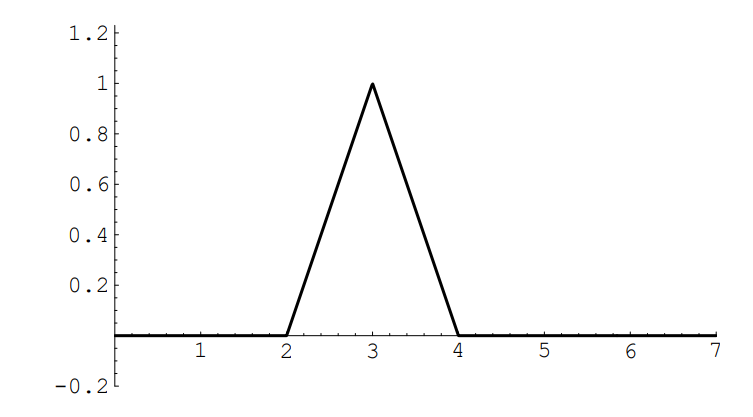

In [3]:
display(Image(filename='img/hat_2d.png'))

que satisfacen:

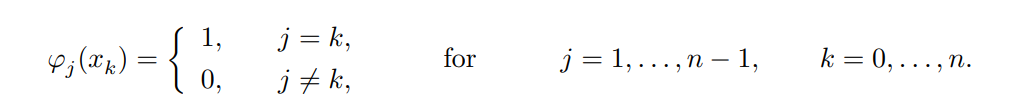

In [6]:
display(Image(filename='img/base_143.png'))

y consideramos todas las funciones en $[0,1]$ continuas y afines a trozos que no son derivables justo en los puntos de la partición, además por las condiciones de frontera, queremos que además cumplan ser nulas en 0 y 1. Este conjunto (que llamaremos $W$) forma un espacio vectorial de dimensión finita ($Dim(W)=n-1$), y es en dicho espacio donde queremos restringir nuestro problema de minimización del funcional $P[u]$. que en este caso está dado por:

$$ \mathcal{P}[u] = \int_{0}^{l} [\frac{1}{2}(x+1)u'(x^2) -u(x) ] dx    $$

$$ s_j = \int_{x_j}^{x_{j + 1}} (1 + x)dx = h(1 + x_j) + \frac{1}{2}h^2 = h + h^2(j + \frac{1}{2} ) \quad \quad \quad b_j = \int_{x_j}^{x_{j + 1}} 1 dx = h$$

Por lo tanto un elemento general de W, está determinado por constantes $c_{1},c_{2},...,c_{n-1}$.
Nuestro problema de condición de frontera, quedaria reducido a encontrar dichas constantes, que serían la solución a un sistema lineal $(n-1)\times(n-1)$:

$$Mc=b$$

Construyamos la Matrix tridiagonal M para cada uno de los tres casos.LLamemos a estas $M_1, M_2, M_3$ para $h_1 = 0.2, h_2 = 0.1, h_3 = 0.05$ respectivamente. Las dimensiones de estas serán: $M_1$ una matriz simétrica $4 \times 4$, $M_2$ una matriz simétrica $9 \times 9$ y $M_3$ una matriz simétrica $19 \times 19$

Recordemos que la forma de la matriz tritiangular dado $ s_j = h + h^2(j + \frac{1}{2}) $ es igual a:

$$ M = \frac{1}{h^2} \begin{vmatrix}
s_0 + s_1 & -s_1  &  &  & \\
-s_1 & s_1 + s_2 & -s_2 & & \\
 & -s_2 &  s_2 + s_3 &  -s_3 & \\
  &  \ddots  & \ddots & \ddots & \\
\end{vmatrix}$$

In [4]:
def sj_values(h):
    #h establece también los puntos en el intervalo
    j_limit = 1/h
    j = 0
    s_array = []
    while j < j_limit:
        #Usamos las solución a la integral de los s_j para contruir un array con sus valores
        s = h + (h**2)*(j + 1/2)
        s_array.append(s) 
        j += 1

    return s_array

def tridiagonal_matrix(h):
    #Como la matrix es simétrica construimos las dos diagonales con la forma tridiagonal propuesta
    s_array = sj_values(h)
    main_diag = []
    sec_diag = []
    for i in range(len(s_array)):
        if i < (len(s_array)-1):
            main_diag.append(s_array[i] + s_array[i + 1])
        if i>0 and i < (len(s_array) - 1):
            sec_diag.append((-1)*s_array[i])
        
    #Creamos tres matrices diagonales y las sumamos
    main_diag = np.array(main_diag)
    sec_diag = np.array(sec_diag)
    d = np.diag(main_diag)
    s_1 = np.diag(sec_diag, k=1)
    s_2 = np.diag(sec_diag, k=-1)
    matrix = d + s_1 + s_2
    matrix = matrix*(1/(h**2))

    return matrix, len(s_array)
        


Definimos dos funciones para la construir la matriz tridiagonal, la primera encuentra todos los valores $s_j$ dentro del intervalo y la segunda crea las diagonales de la matriz. La diagonal principal la encuentra sumando $s_j + s_{j + 1}$ desde $j = 0$ hasta $j = 1/h - 1$. La otra diagonal que es la misma para arriba y abajo de la diagonal principal es el negativo de $s_j$ desde $j = 0$ hasta $j = 1/h - 2$. Se construyen tres matrices con las diagonales y se suman para obtener la matriz tridiagonal.

In [5]:

def linearSystem(h):
    #Resolvemos el sistema lineal homogéneo

    matrix = tridiagonal_matrix(h)[0]
    dim = tridiagonal_matrix(h)[1] - 1

    b = [h]*dim 
    b = np.transpose(np.matrix(np.array(b)))

    matrix_inverse = np.linalg.inv(matrix)
    c = matrix_inverse*b

    return c


Para resolver el sistema $Mc = b$, construimos el vector $b$ que corresponde a un vector columna de dimnesión $\frac{1}{h} - 1$ y obtenemos la inversa de $M$ para resolver $c = M^{-1} b$. 

Ahora creamos una función para graficar los coeficientes obtenidos. 

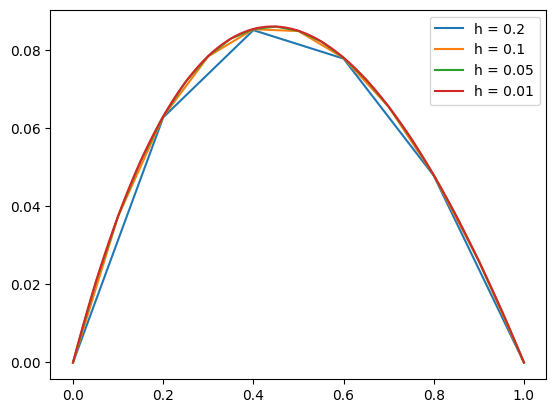

In [95]:

def h_plot(h):
    c = linearSystem(h)
    c = np.transpose(c)
    y = c.tolist()[0]
    y.insert(0, 0)
    y.append(0)
    
    x = []
    i = 0

    while i < 1:
        i = round(i, 2)
        x.append(i)
        i += h
    
    x.append(1.0)

    plot_label = "h = " + str(h)
    plt.plot(x,y, label= plot_label)

    return x, y, len(x), len(y)

def show_results(h):
    c = h_plot(h)
    plt.show()
    print(c)


def all_h_plots(h_array):
    for h in h_array:
        h_plot(h)
    plt.legend()
    plt.show()
    return None

h_array = [0.2, 0.1, 0.05, 0.01]

all_h_plots(h_array)
